In [6]:
import sympy
from sympy import *
from sympy.matrices import *
import numpy as np
import math
import matplotlib.pyplot as plt
import tabulate
from mpmath import mp
%matplotlib inline 
init_session

<function sympy.interactive.session.init_session>

# Problem 9.1

In [99]:
b_0, b_1, b_2 = sympy.symbols("b_0, b_1 b_2")
C = sympy.Matrix([[b_0, b_1, b_2]])
# C = sympy.MatrixSymbol('C', 1, 3) # C = [b_0, b_1, b_2]
# P = sympy.MatrixSymbol('P', 3, 3)
p_11, p_12, p_13 = sympy.symbols("p_11 p_12 p_13")
p_22, p_23 = sympy.symbols("p_22 p_23")
p_33 =  sympy.symbols("p_33")

P = sympy.Matrix([[0.5*p_11, p_12, p_13],[0, 0.5*p_22, p_23], [0, 0, 0.5*p_33]])
P = P + P.transpose()
a = sympy.symbols("a")
A = sympy.Matrix([[0,1,0], [0,0,1], [-1,-1,-a]])
B = sympy.Matrix([[0],[0],[1]])
Q = C.transpose()*C

In [100]:
m = P*A + A.transpose()*P
variables = (p_11, p_12, p_13, p_22, p_23, p_33)
eqns = []
for i in xrange(0,3):
    for j in xrange(i,3):
        eqns.append(m[i,j] + Q[i,j])


In [101]:
soln = linsolve(eqns, variables)

In [102]:
tsoln.args

0.5*(a*b_0**2 - 2*b_0*b_2 + b_1**2 + b_2**2)/(a - 1)

# Problem 9.2

In [80]:
a, b = sympy.symbols("a b", real=True)
w = sympy.symbols("w", real=True)
# a = 10
b = -2
# b = - 4
# a = 2 - np.sqrt(3)
A = sympy.Matrix([[-1,0,0,0],[0, a, 0, 0],[0,1,-b,1],[0,-1,-1,0]])
B_1 = sympy.Matrix([[1,0],[0,0],[0,1],[0,-1]])
B_2 = sympy.Matrix([[0],[1],[0],[0]])
C_2 = sympy.Matrix([[1,0,-1,0]])
D_21 = sympy.Matrix([[0,0]])
C_1 = sympy.Matrix([[1,0,-1,0],[0,0,0,0]])
D_11 = sympy.Matrix([[0,0],[0,0]])
D_12 = sympy.Matrix([[0],[1]])

In [81]:
lam = A.eigenvals()
print(len(lam))
vec_r = A.eigenvects()
vec_l = A.transpose().eigenvects()

3


In [82]:
for idx in xrange(0,len(vec_l)):
    d_r = vec_r[idx]
    d_l = vec_l[idx]
    
    eigen_val = d_r[0]
    multiplicity = d_r[1]
    vR = d_r[2][0]
    vL = d_l[2][0]
    
    pB = vL.transpose()*B_2
    Cp = C_2*vR
    
    print(v.shape)
    print"eigen_val = ", eigen_val
    print"multiplicity = ", multiplicity
    print'eigenvector = \n', v
    print "\n p*B = \n"
    print latex(pB[0])
    print "\n\n"
#     print latex(pB)
    print "\n C_2*p = \n "
    print latex(Cp[0])
#     print latex(Cp)
    print("\n\n\n")
    

(4, 1)
eigen_val =  -1
multiplicity =  1
eigenvector = 
Matrix([[0], [1], [0], [0]])

 p*B = 

0




 C_2*p = 
 
1




(4, 1)
eigen_val =  1
multiplicity =  2
eigenvector = 
Matrix([[0], [1], [0], [0]])

 p*B = 

0




 C_2*p = 
 
1




(4, 1)
eigen_val =  a
multiplicity =  1
eigenvector = 
Matrix([[0], [1], [0], [0]])

 p*B = 

1




 C_2*p = 
 
1






# 9.2 (d)

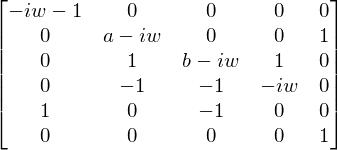

In [205]:
# form the matrix to test for controllability
# T = sympy.Matrix([[A - sympy.I*w*sympy.Matrix.eye(4), B_2],[C_1, D_12]])
N = 4
# sympy.Matrix([T_11, B_2])
temp = A - sympy.I*w*sympy.Matrix.eye(4)
T_1 = temp.row_join(B_2)
T_2 = C_1.row_join(D_12)
T = T_1.col_join(T_2)
T

In [202]:
latex(T)

'\\left[\\begin{matrix}- i w - 1 & 0 & 0 & 0 & 0\\\\0 & a - i w & 0 & 0 & 1\\\\0 & 1 & b - i w & 1 & 0\\\\0 & -1 & -1 & - i w & 0\\\\1 & 0 & -1 & 0 & 0\\\\0 & 0 & 0 & 0 & 1\\end{matrix}\\right]'

# 9.2 (e)

(5, 6)


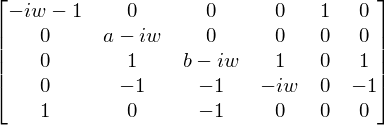

In [208]:
temp = A - sympy.I*w*sympy.Matrix.eye(4)
S_1 = temp.row_join(B_1)
S_2 = C_2.row_join(D_21)
S = S_1.col_join(S_2)
print(S.shape)
S

In [209]:
latex(S)

'\\left[\\begin{matrix}- i w - 1 & 0 & 0 & 0 & 1 & 0\\\\0 & a - i w & 0 & 0 & 0 & 0\\\\0 & 1 & b - i w & 1 & 0 & 1\\\\0 & -1 & -1 & - i w & 0 & -1\\\\1 & 0 & -1 & 0 & 0 & 0\\end{matrix}\\right]'